In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing   

In [0]:
# X:input
# y:output
def getDate():
    dataset = pd.read_csv('.//dataset.csv')
    X = dataset.iloc[:, [0,1,2,3,4,5]].values
    y = dataset.iloc[:, 6].values
    return X,y

In [0]:
# 70% 訓練集，30% 測試集

def getSplit():
    X, y = getDate()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)   
    # 標準化
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
    # 歸一化
    min_max_scaler = preprocessing.MinMaxScaler()  
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

## SVM
## 參數說明

* kernel
    1. linear
    2. rbf
    3. sigmoid
* C(懲罰函數)
    * 可以自己調整

In [8]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = getSplit()
clf_SVM = SVC(C = 2, kernel = 'linear', random_state = 0)
clf_SVM.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# 預測結果
y_pred = clf_SVM.predict(X_test)

In [10]:
# 正確率
accuracy_score(y_test, y_pred)

0.5384615384615384

## 隨機森林
### 因為每棵樹都取後放回，每個資料被選中機率是n分之1，沒被選中是1-(n分之1)，選擇n次

### 參數說明
* n_estimators 
    * 決策數樹的數量
* max_features 
    * 最大特徵(可以自己調整)
* criterion 
    1. 'entropy' 
    2. 'gini'


In [0]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = getSplit()

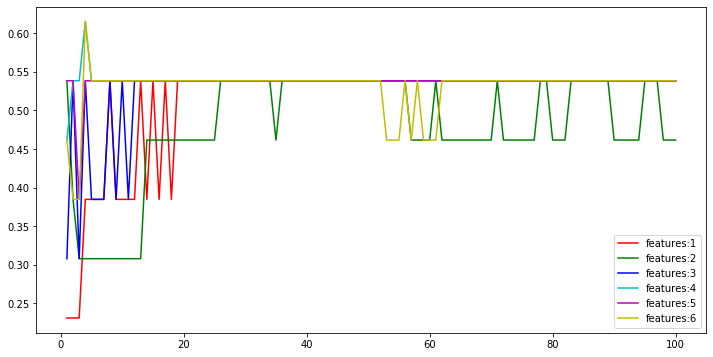

In [12]:
# 圖size
plt.figure(figsize=(12, 6))
# 圖的顏色
color = ['r','g', 'b', 'c', 'm', 'y']

# 雙迴圈
# 樹從1~100
# 特徵從1~6
for j in range (1,7,1):
    acc = []
    trees = []
    for i in range (1,101,1):
        clf_RF = RandomForestClassifier(n_estimators = i, max_features= j , criterion = 'gini', random_state = 0)
        clf_RF.fit(X_train, y_train)
        y_pred = clf_RF.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        trees.append(i) 
    
    plt.plot(trees, acc, color = color[j-1], label= '{}{}'.format('features:', j))
    plt.legend(loc='best')
plt.show()    

# 最佳組合
# max_features=6
# n_estimators=4



In [13]:
clf_RF = RandomForestClassifier(n_estimators = 4, max_features= 6 , criterion = 'gini', random_state = 0)
clf_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6153846153846154


In [14]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

df = pd.read_csv('dataset.csv')
names = list(df)

X = df.iloc[:, [0,1,2,3,4,5]].values
Y = df.iloc[:, 6].values

rf = RandomForestRegressor()
rf.fit(X, Y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, names[indices[f]], importances[indices[f]]))
    
print('---'*10)

print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

 1) age                            0.317069
 2) character                      0.227228
 3) sex                            0.177466
 4) social                         0.164818
 5) interest                       0.091995
 6) edu                            0.021424
------------------------------
Features sorted by their score:
[(0.3171, 'age'), (0.2272, 'character'), (0.1775, 'sex'), (0.1648, 'social'), (0.092, 'interest'), (0.0214, 'edu')]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


sex = 0.17746611526378642
age = 0.3170689158903874
edu = 0.021424080777851618
character = 0.22722759820537528
social = 0.1648183050179099
interest = 0.09199498484468947


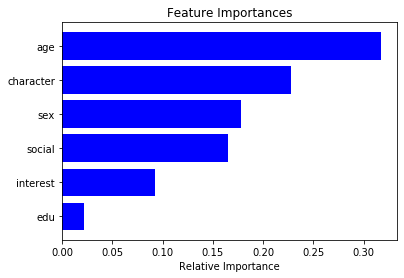

In [15]:
for name, importance in zip(names, rf.feature_importances_):
    print(name, "=", importance)
##
features = names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## C5.0 決策樹
### 十次交叉驗證法
* cv 交叉驗證次數
* criterion
    - entropy
    - gini

In [0]:
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

X,y = getDate()
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
# 平均正確率
print(cross_val_score(clf, X, y, cv=10).mean())

0.6133333333333334


## GBDT

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = getSplit()
clf_GBDT = GradientBoostingClassifier(n_estimators=4, max_depth=1, min_samples_split=2, learning_rate=0.1)
# print(cross_val_score(clf, X, y, cv=10).mean())
clf_GBDT.fit(X_train, y_train)
y_pred = clf_GBDT.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6923076923076923
